<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Calculate-for-validation-set" data-toc-modified-id="Calculate-for-validation-set-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Calculate for validation set</a></span></li></ul></div>

# Calculate for validation set

In [355]:
import os
import skimage
import numpy as np
import pandas as pd
import skimage.segmentation
import matplotlib.pyplot as plt

from iou_metric import rles_to_mask, iou_map

In [356]:
train_df = pd.read_csv("dataset/train.csv")
shape = train_df[['height', 'width']].values[0]

In [357]:
train_df = train_df.groupby('id').agg(list).reset_index()

In [358]:
def calc_iou(submission_path, train_df, visualize=False, verbose=False):
    prediction_df = pd.read_csv(submission_path)
    prediction_df = prediction_df.groupby('id').agg(list).reset_index()
    iou_list = []
    for i, row in prediction_df.iterrows():
        annot = train_df[train_df["id"] == row.id].annotation.values[0]
        pred = row.predicted
        ann = rles_to_mask(annot, shape)
        pred = rles_to_mask(pred, shape)
        iou_list.append(iou_map([ann] , [pred], verbose=verbose))
        if visualize:
            fig, ax = plt.subplots(2, figsize=(15, 15))
            ax[0].imshow(val_pred)
            ax[1].imshow(val_ann)
            plt.show()
    return np.mean(iou_list)

In [359]:
def ensemble_pred_masks(masks, shape=(520, 704)):
    result = np.zeros(shape, dtype=float) 
    # for i, mask in enumerate(masks):
    #     mask = mask * (1 - result)
    #     if mask.sum() >= 100:
    #         result += mask
    for i, mask in enumerate(masks):
        result += mask
    result[result >= len(masks) // 2] = masks[0][result >= len(masks) // 2]
    return result

In [363]:
def ensemble_iou(submission_paths, train_df, visualize=False, verbose=False):
    prediction_dfs = [
        pd.read_csv(submission_path)
        for submission_path in submission_paths
    ]

    prediction_dfs = [
        prediction_df.groupby('id').agg(list).reset_index()
        for prediction_df in prediction_dfs
    ]

    iou_list = []
    for index in range(len(prediction_df)):
        rows = [prediction_df.iloc[index] for prediction_df in prediction_dfs]
        preds = []
        for row in rows:
            annot = train_df[train_df["id"] == row.id].annotation.values[0]
            pred = row.predicted
            ann = rles_to_mask(annot, shape)
            pred = rles_to_mask(pred, shape)
            preds.append(pred.astype(np.int64))
        ensemble_pred = ensemble_pred_masks(preds)
        iou_list.append(iou_map([ann], [ensemble_pred], verbose=verbose))
        if visualize:
            print(index)
            fig, ax = plt.subplots(1, len(preds), figsize=(15, 15))
            for i in range(len(preds)):
                ax[i].imshow(preds[i], cmap="tab20")
            plt.show()
            fig, ax = plt.subplots(1, 3, figsize=(15, 15))
            ax[0].imshow(pred, cmap="tab20")
            ax[1].imshow(ensemble_pred, cmap="tab20")
            ax[2].imshow(ann, cmap="tab20")
            plt.show()
        #assert (ensemble_pred != preds[0]).all()
    return np.mean(iou_list)

In [386]:
submission_paths_old = [
    "eval/experiment_nuclei_diameter0/cellpose_residual_on_style_on_concatenation_off_train_converted_split_2021_12_25_12_13_05.237773_epoch_999/submission.csv",
    "eval/experiment_cyto_diameter20/cellpose_residual_on_style_on_concatenation_off_train_converted_split_2021_12_24_07_14_36.376481_epoch_999/submission.csv",
    "eval/experiment_nuclei_diameter20/cellpose_residual_on_style_on_concatenation_off_train_converted_split_2021_12_24_17_54_16.110001_epoch_999/submission.csv",
    "eval/experiment_omni_diameter20/cellpose_residual_on_style_on_concatenation_off_omni_train_converted_split_2021_12_25_02_50_03.864047_epoch_999/submission.csv",
    "eval/experiment_cyto_diameter0/cellpose_residual_on_style_on_concatenation_off_train_converted_split_2021_12_24_11_31_46.912635_epoch_999/submission.csv",
]
# 0.3209311045011456
# 0.31134603045510506
# 0.2705431505423201
# 0.23306007847313015
# 0.20231834974299234

# worst preds:
# experiment_cyto_diameter0
# experiment_nuclei_diameter16
# experiment_omni_diameter20
# experiment_omni_diameter0
submission_paths = [
    "eval/experiment_cyto_diameter20/cellpose_residual_on_style_on_concatenation_off_train_converted_split_2021_12_24_07_14_36.376481_epoch_999/submission.csv",
    # "eval/experiment_cyto_diameter0/cellpose_residual_on_style_on_concatenation_off_train_converted_split_2021_12_24_11_31_46.912635_epoch_999/submission.csv",
    # "eval/experiment_omni_diameter20/cellpose_residual_on_style_on_concatenation_off_omni_train_converted_split_2021_12_25_02_50_03.864047_epoch_999/submission.csv",
    # "eval/experiment_omni_diameter0/cellpose_residual_on_style_on_concatenation_off_omni_train_converted_split_2021_12_26_03_51_44.296669_epoch_999/submission.csv",
    "eval/experiment_nuclei_diameter0/cellpose_residual_on_style_on_concatenation_off_train_converted_split_2021_12_25_12_13_05.237773_epoch_999/submission.csv",
    "eval/experiment_nuclei_diameter20/cellpose_residual_on_style_on_concatenation_off_train_converted_split_2021_12_24_17_54_16.110001_epoch_999/submission.csv",
    "eval/experiment_nuclei_diameter0_longer/cellpose_residual_on_style_on_concatenation_off_train_converted_split_2021_12_26_13_13_08.568327_epoch_1999/submission.csv",
    # "eval/experiment_nuclei_diameter16/cellpose_residual_on_style_on_concatenation_off_train_converted_split_2021_12_27_08_52_55.231418_epoch_1999/submission.csv",
    "eval/experiment_nuclei_diameter24/cellpose_residual_on_style_on_concatenation_off_train_converted_split_2021_12_26_22_34_44.922115_epoch_1999/submission.csv",
]   

In [388]:
 ensemble_iou(submission_paths, train_df)

0.3099122585477226

In [365]:
 ensemble_iou(submission_paths, train_df)

0.31431195549619795

0


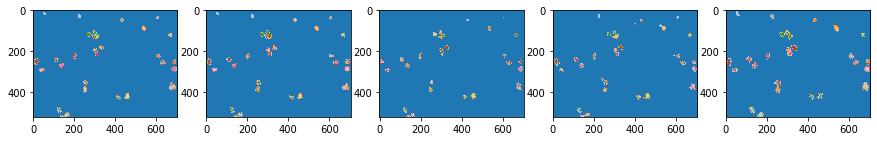

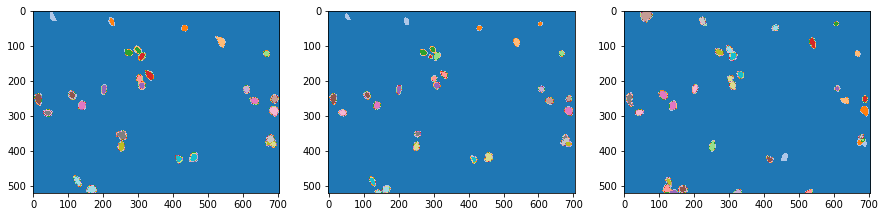

1


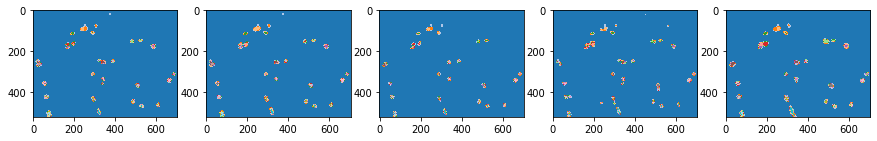

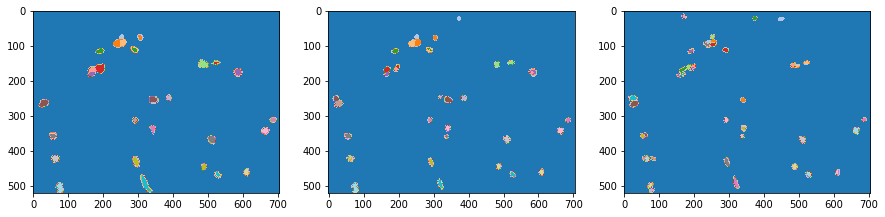

2


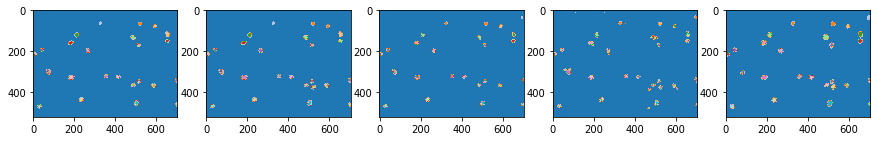

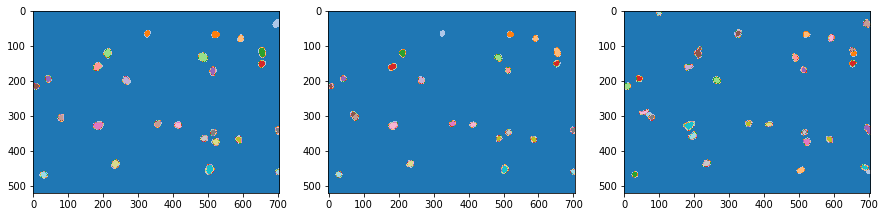

3


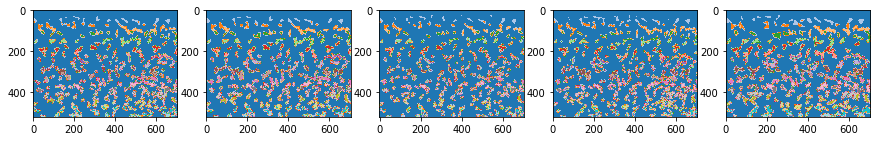

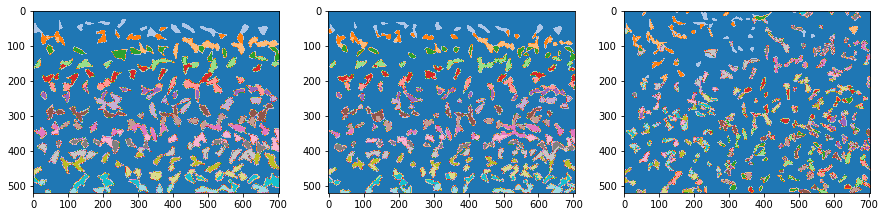

4


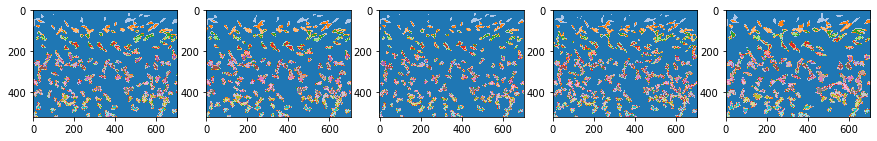

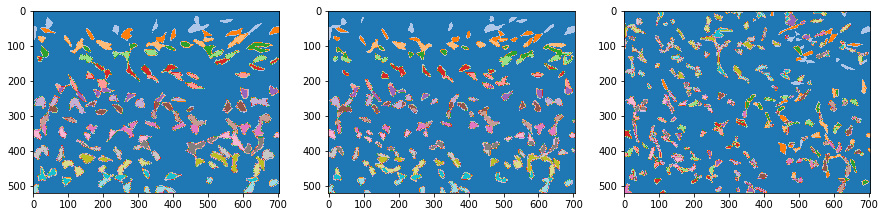

5


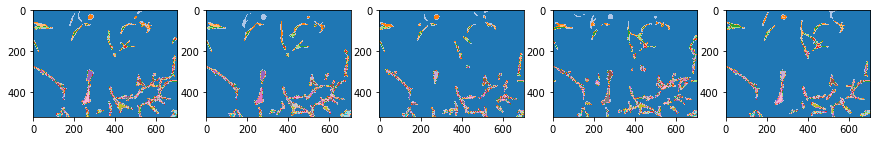

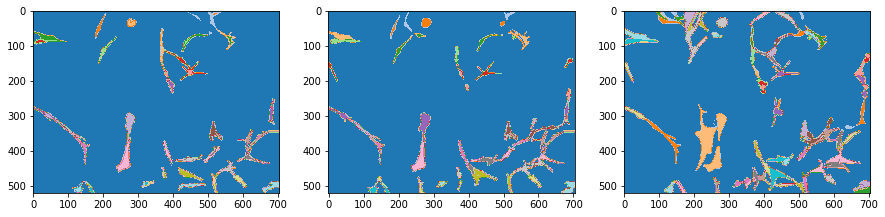

6


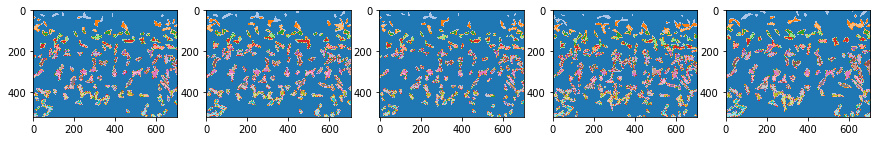

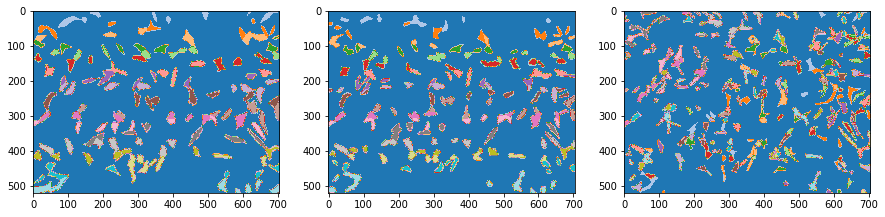

7


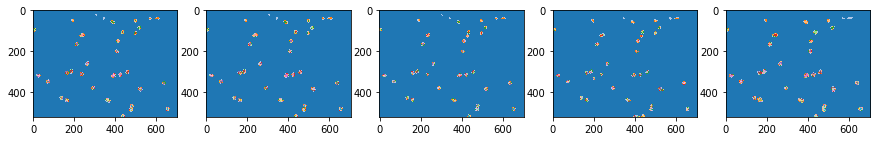

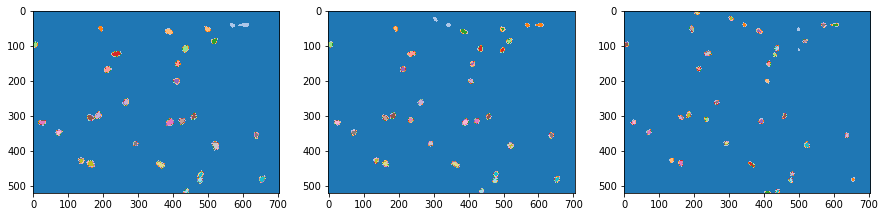

8


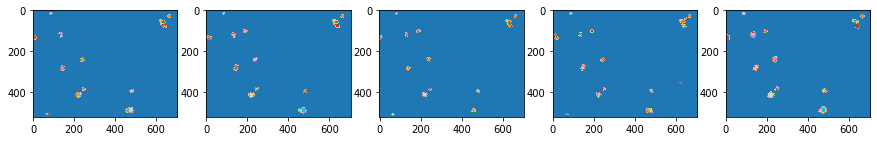

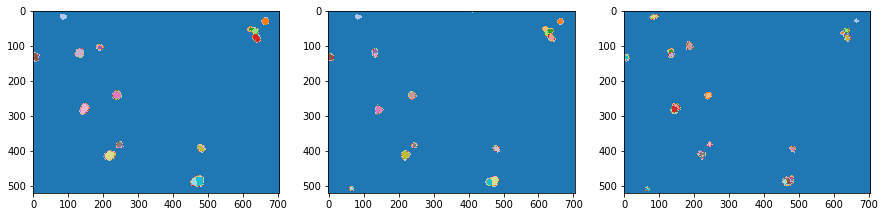

9


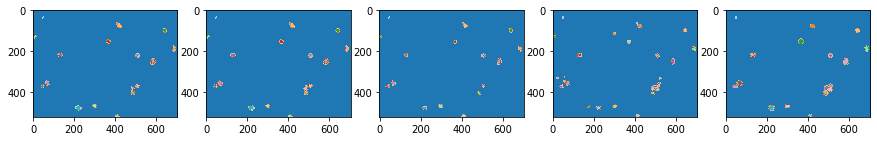

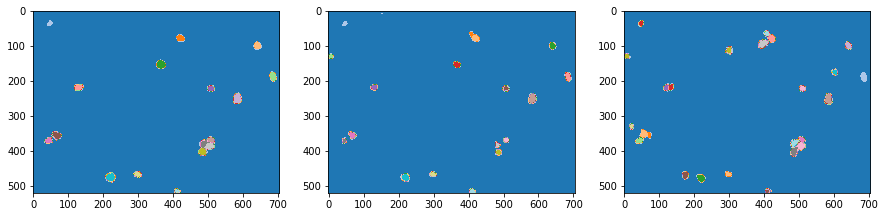

10


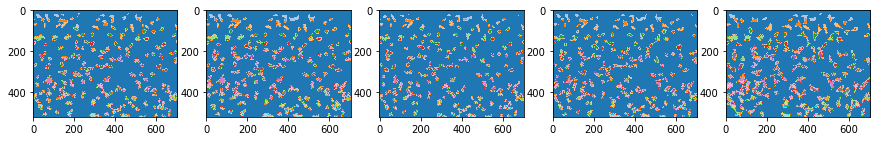

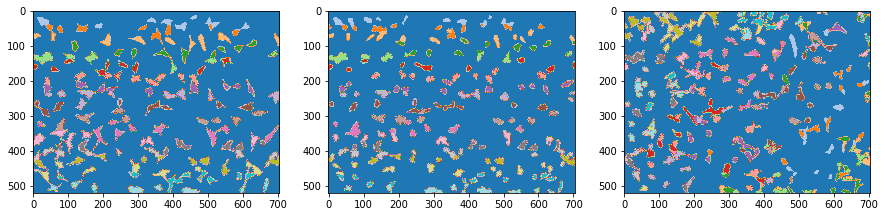

11


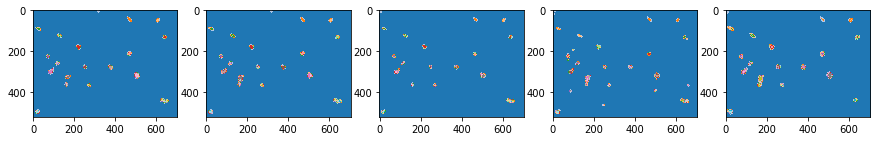

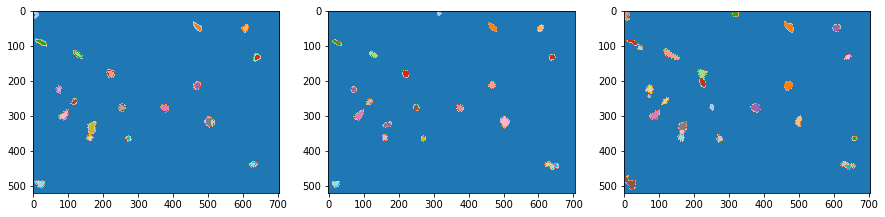

12


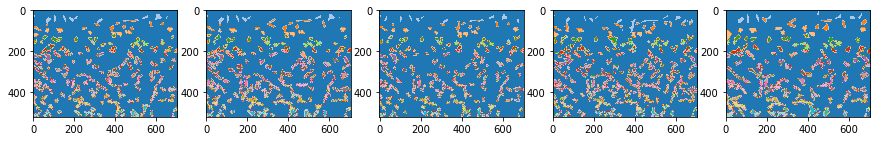

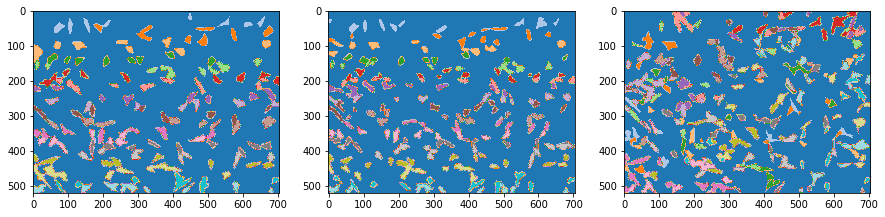

13


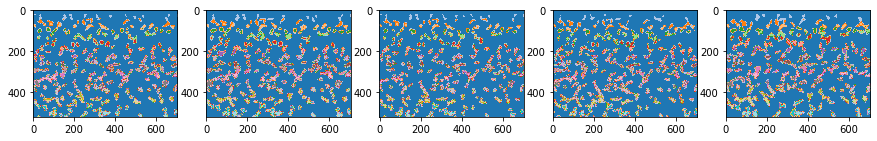

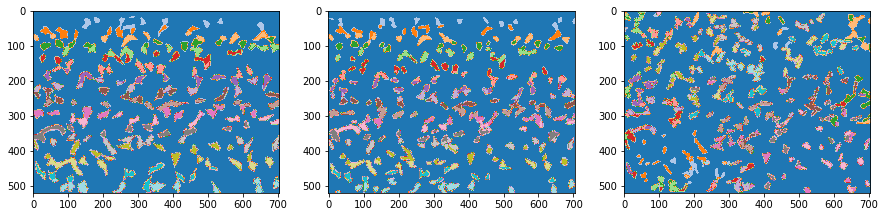

14


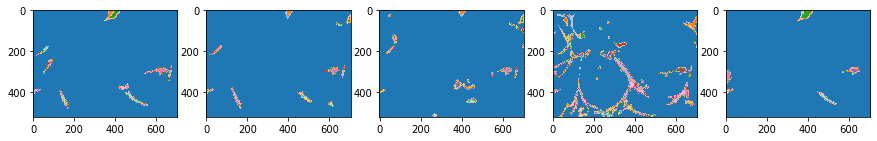

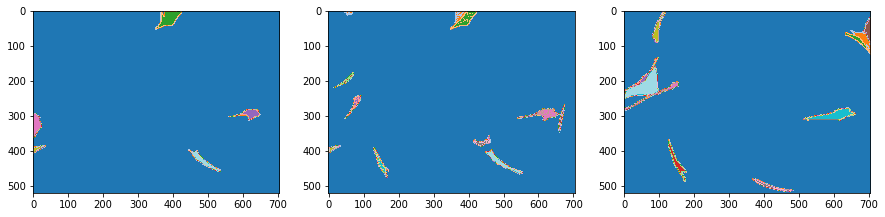

15


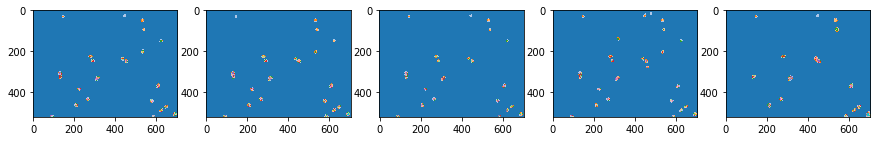

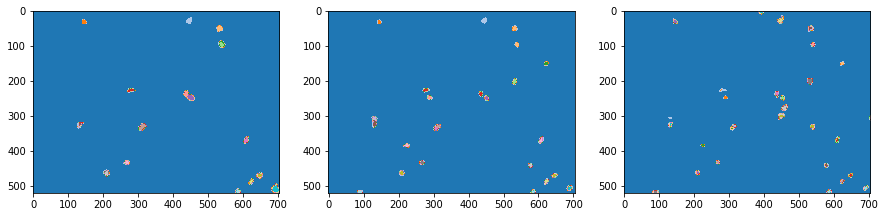

16


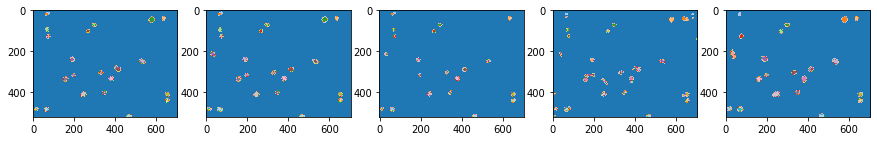

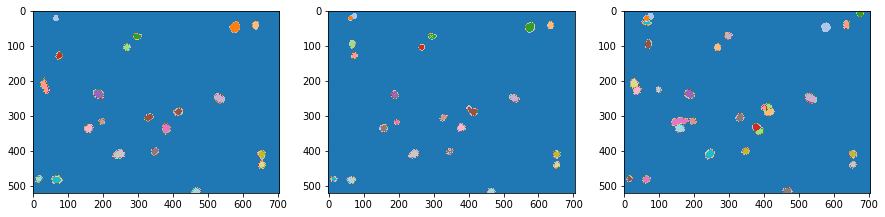

17


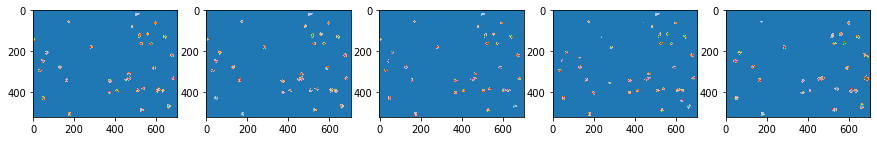

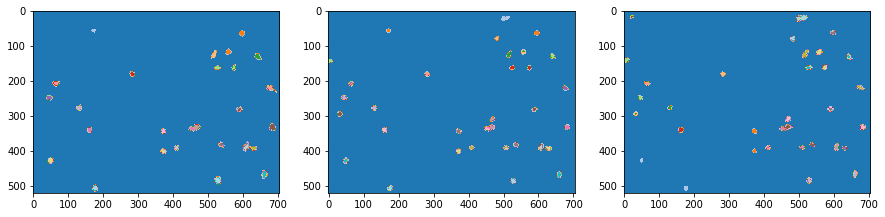

18


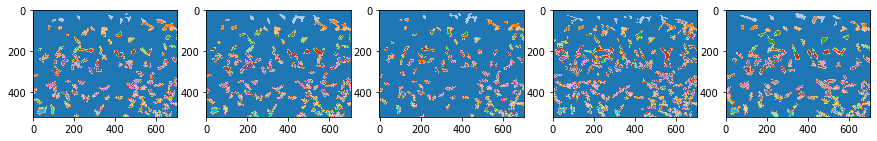

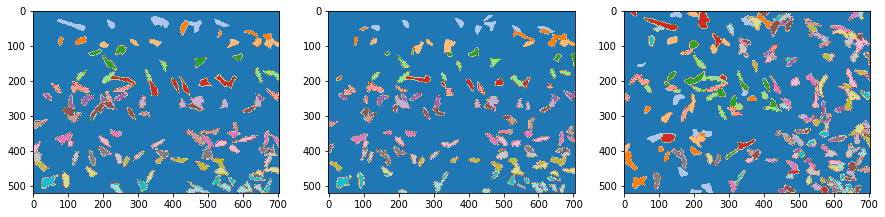

19


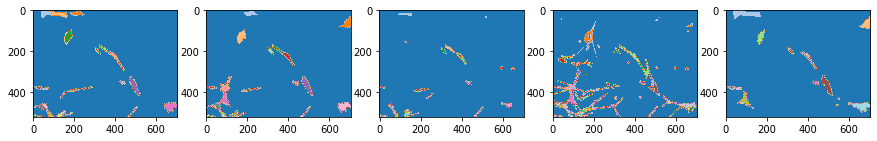

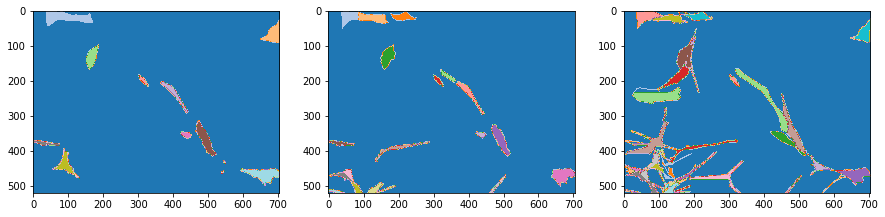

20


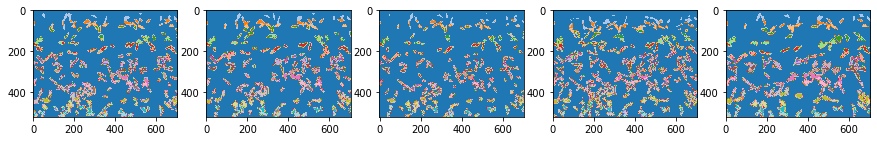

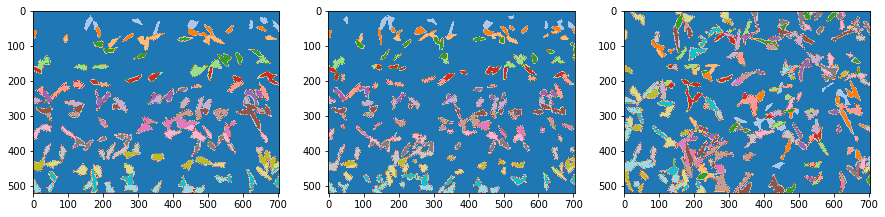

21


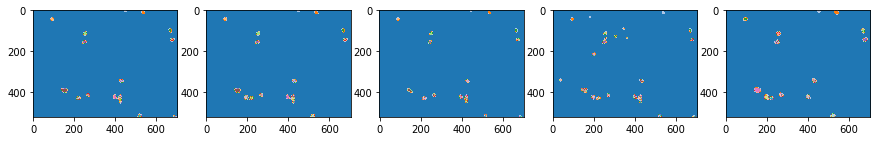

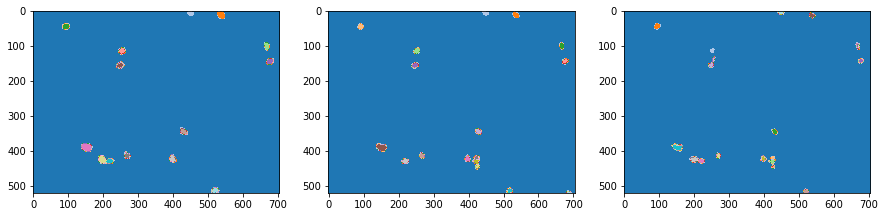

22


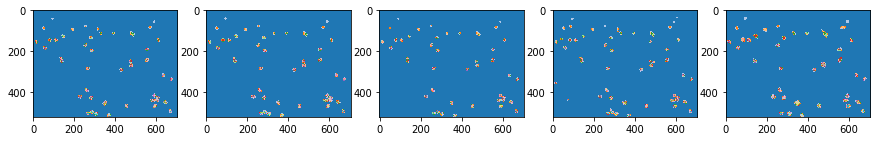

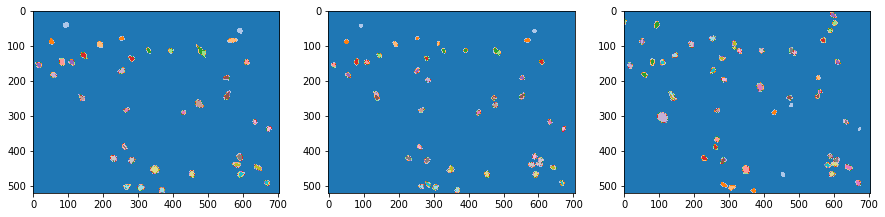

23


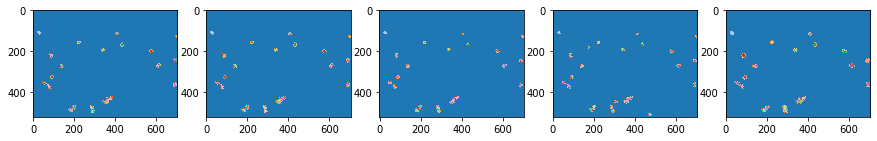

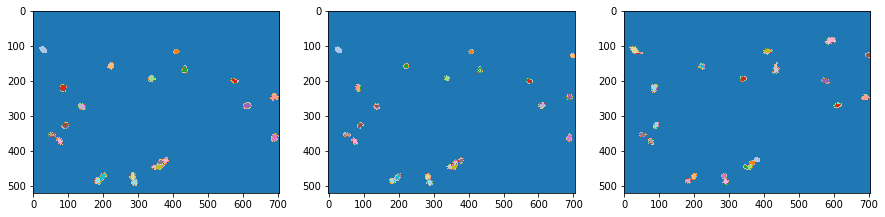

24


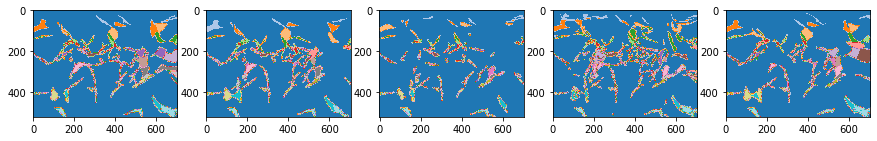

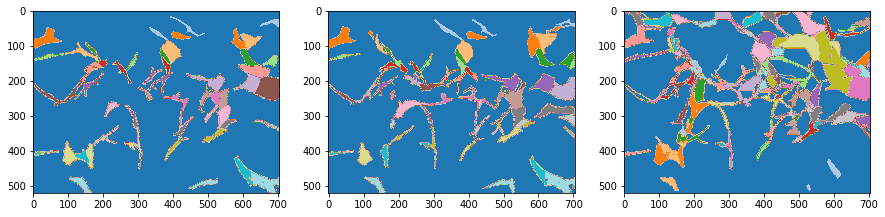

25


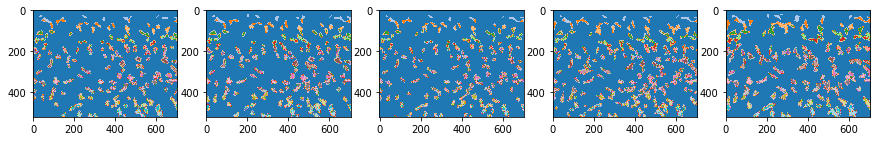

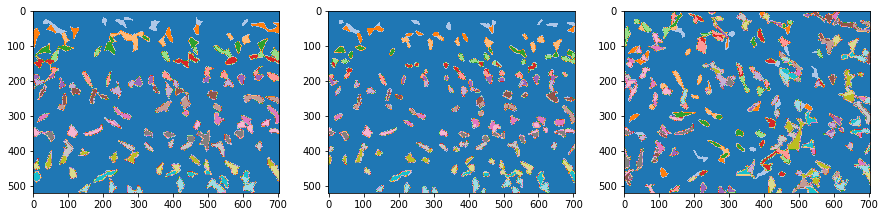

26


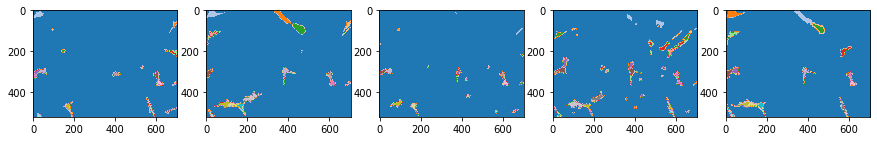

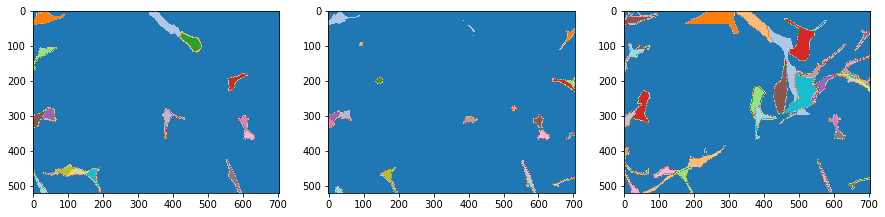

27


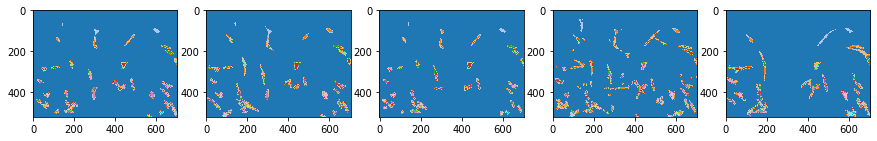

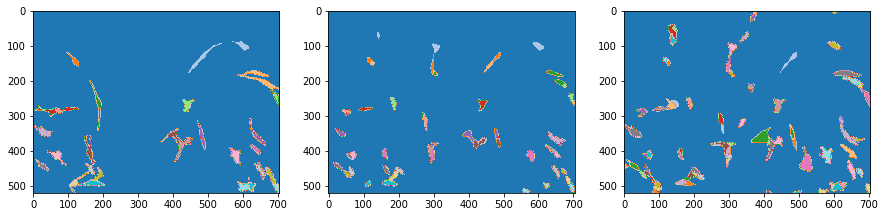

28


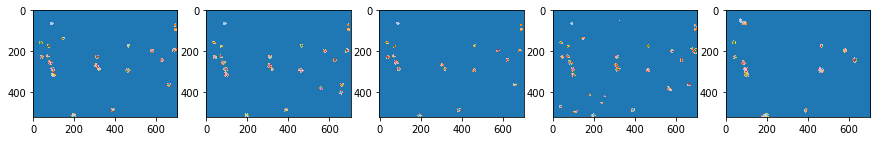

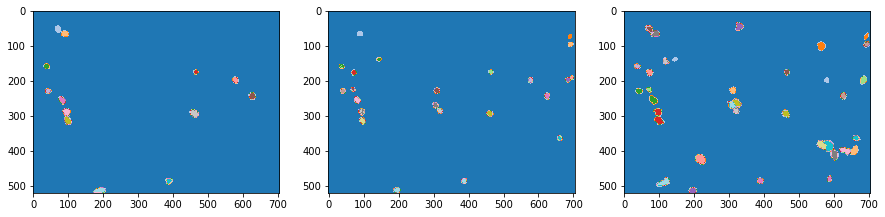

29


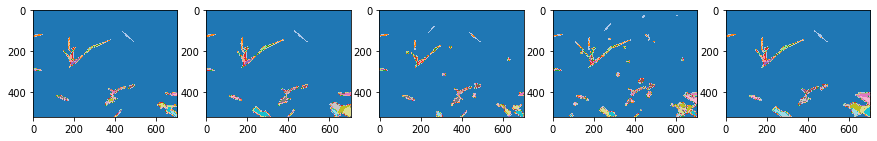

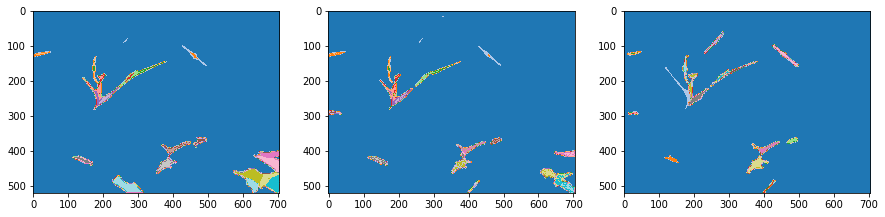

30


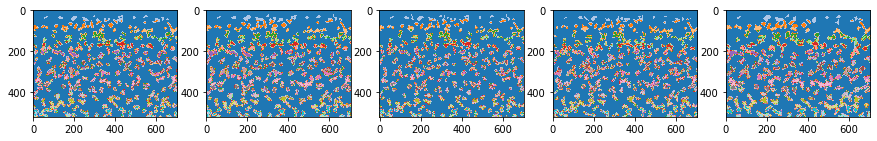

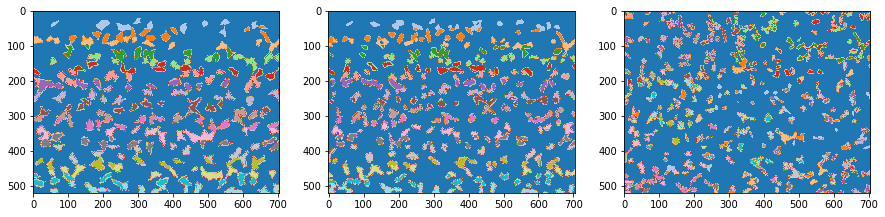

31


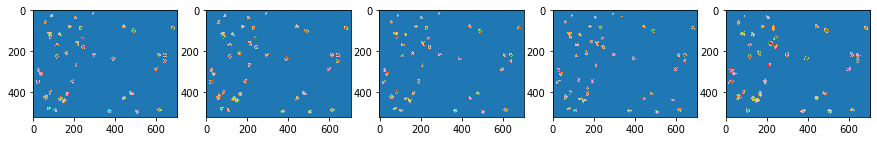

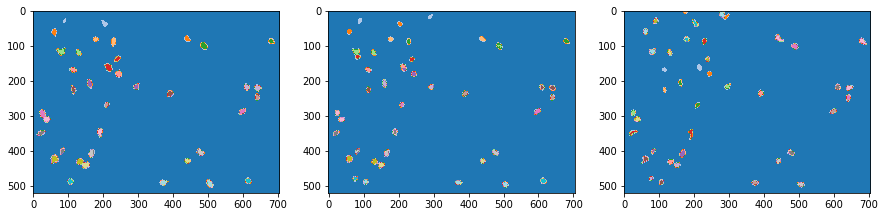

32


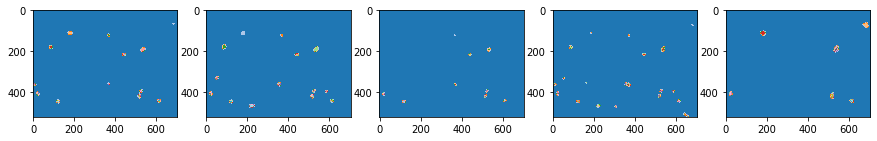

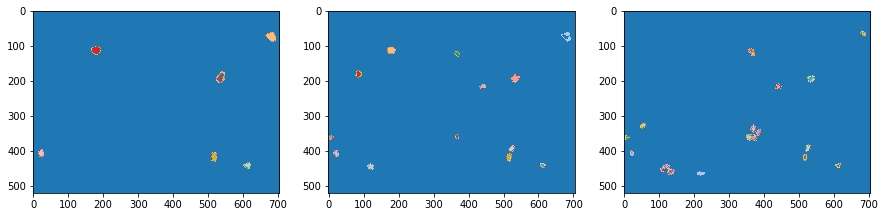

33


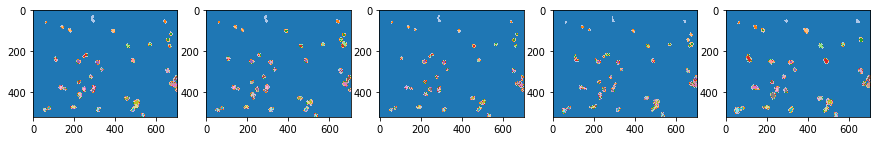

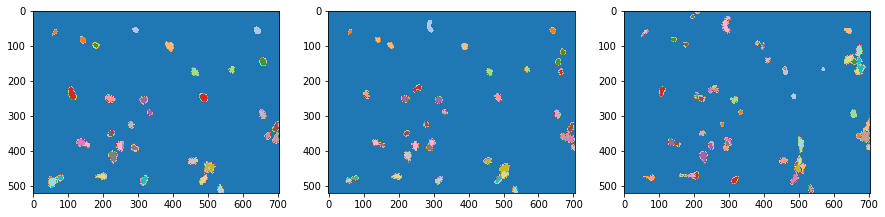

34


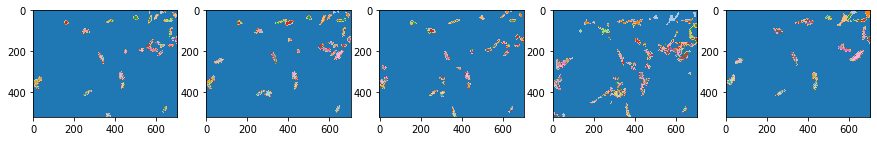

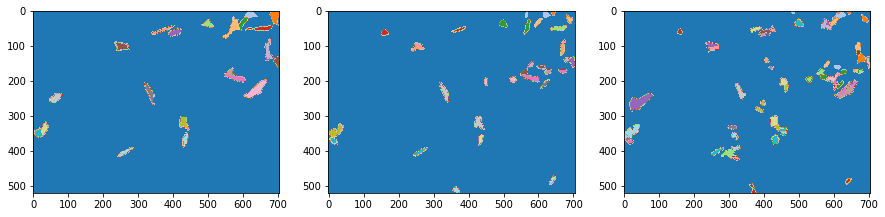

35


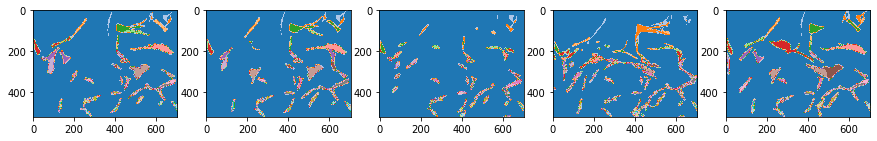

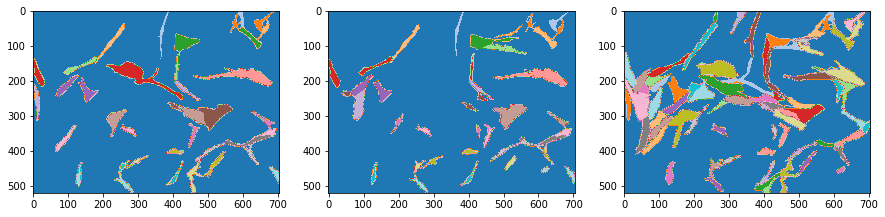

36


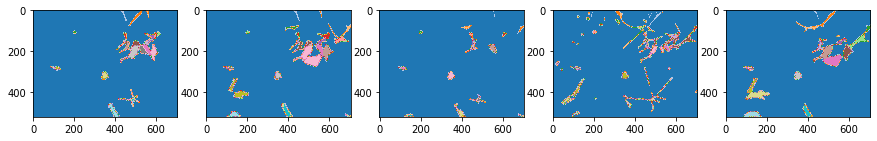

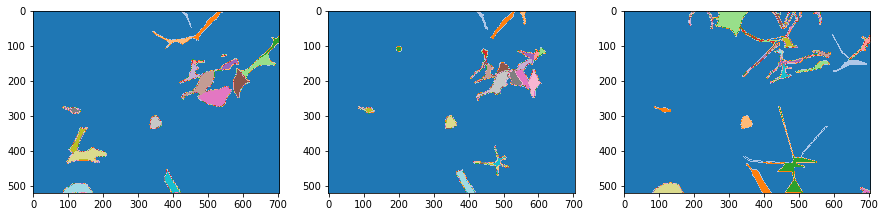

37


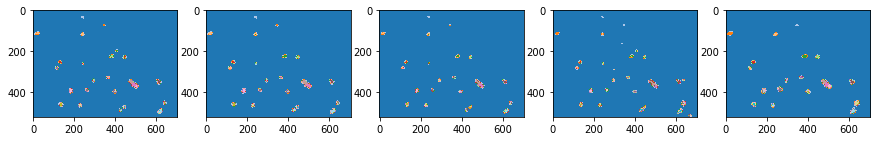

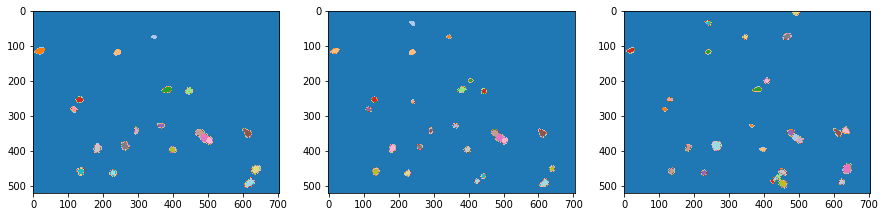

38


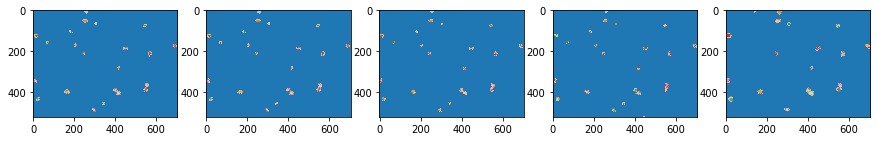

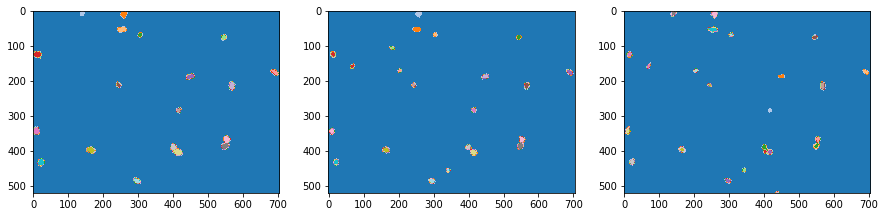

39


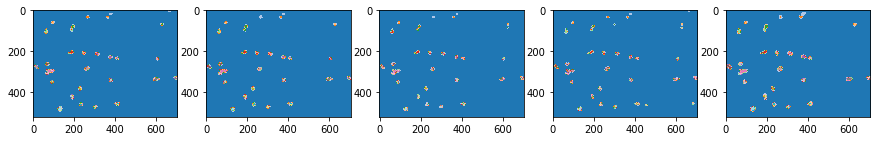

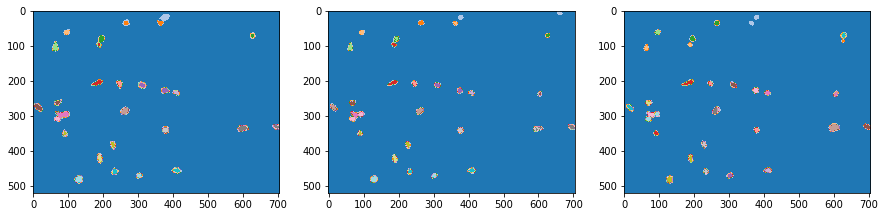

40


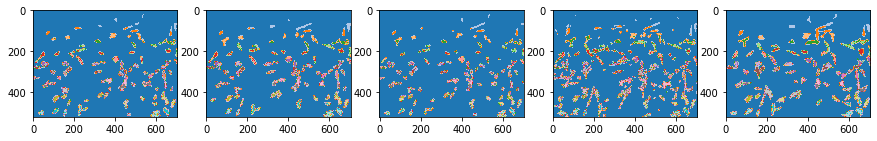

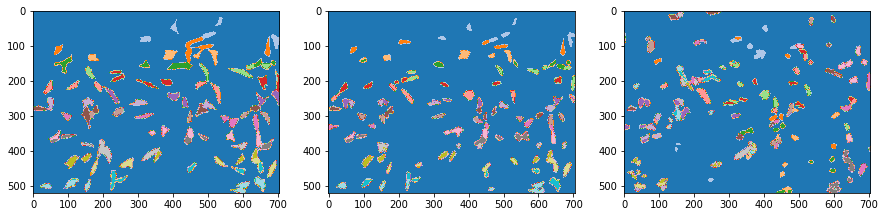

41


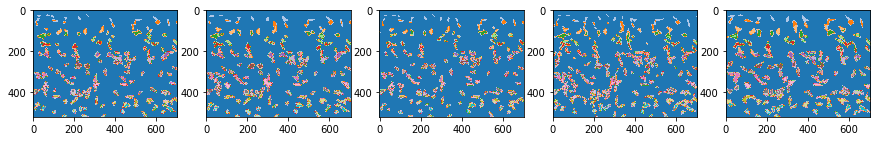

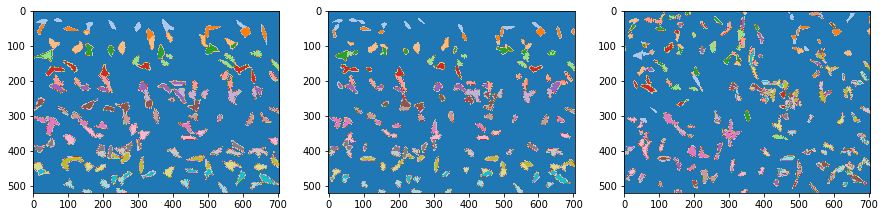

42


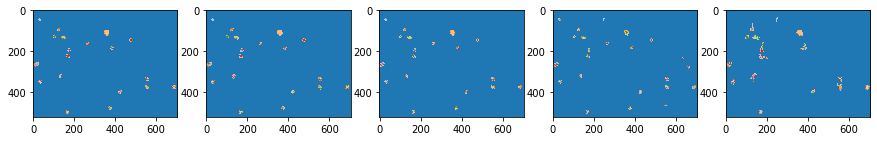

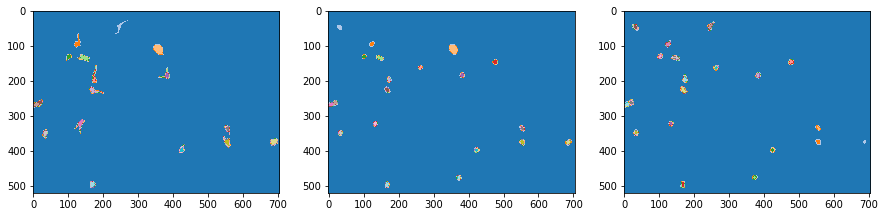

43


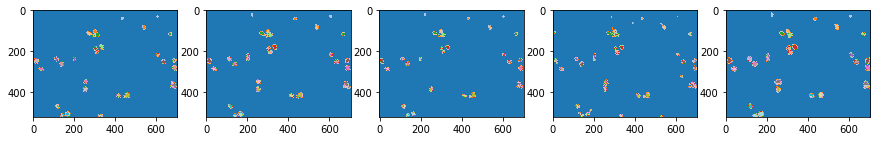

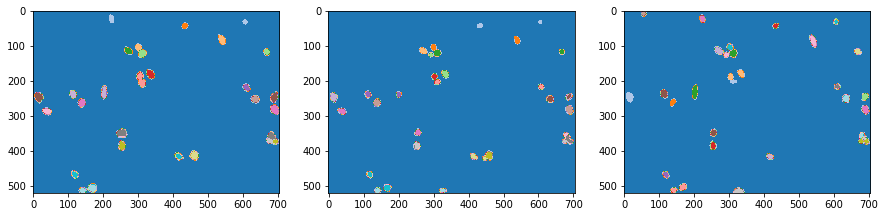

44


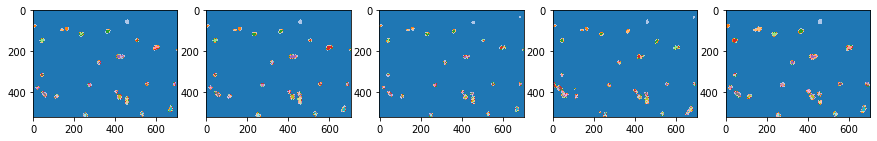

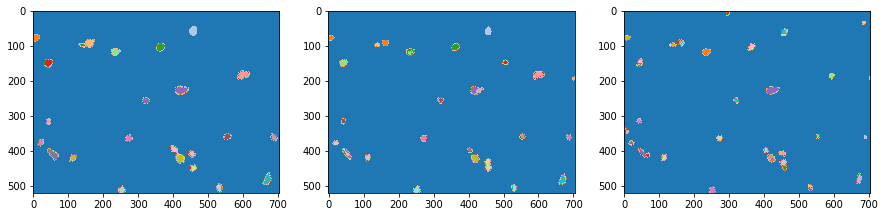

45


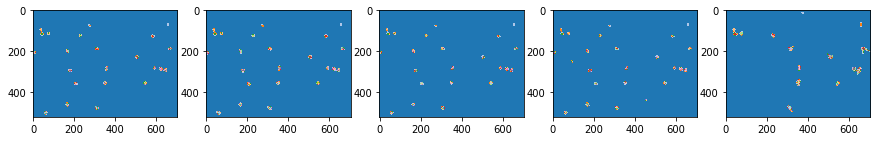

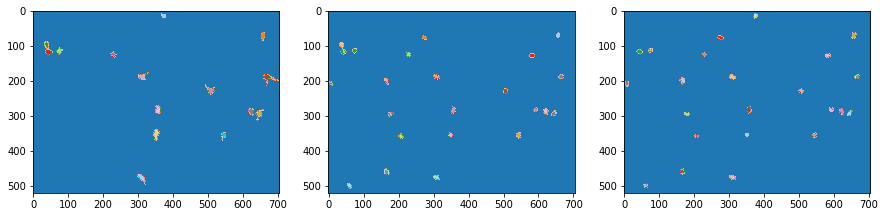

46


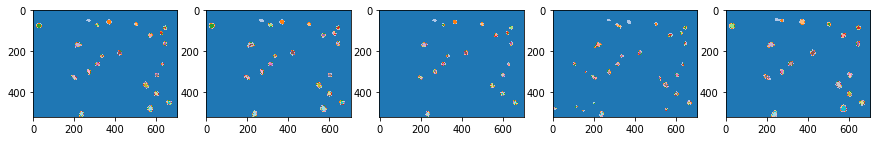

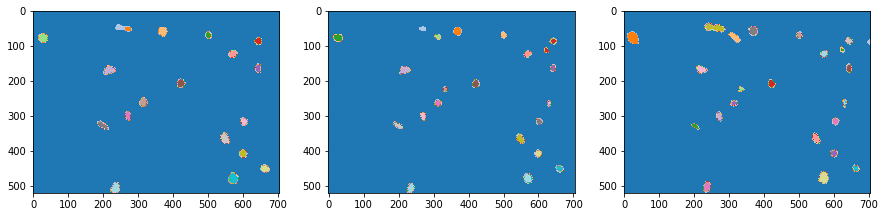

47


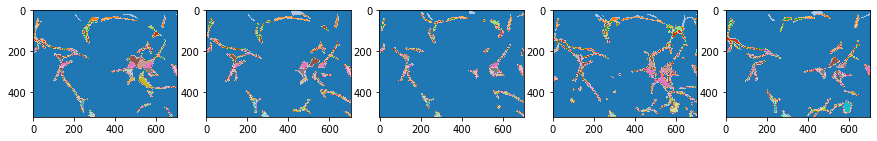

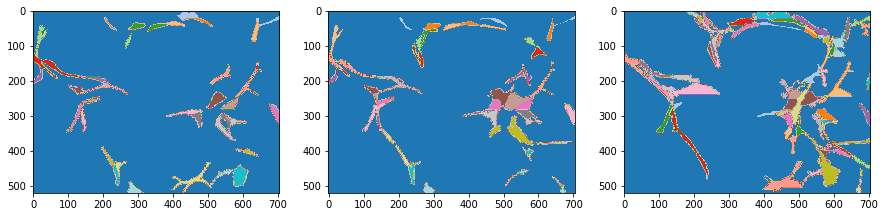

48


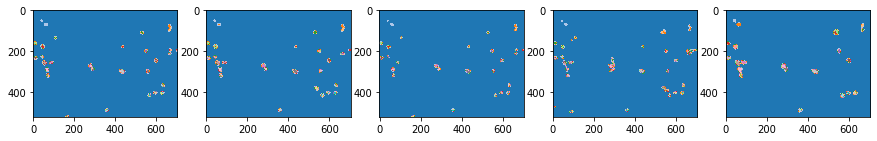

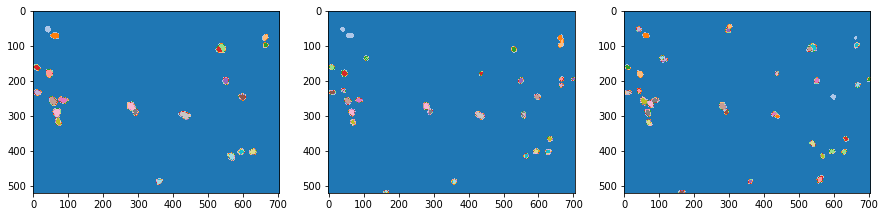

49


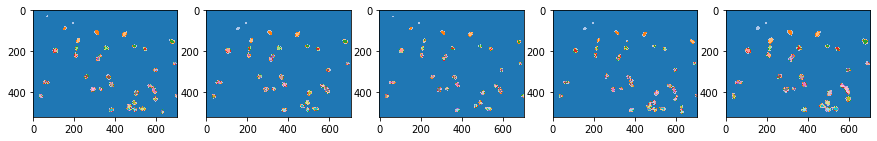

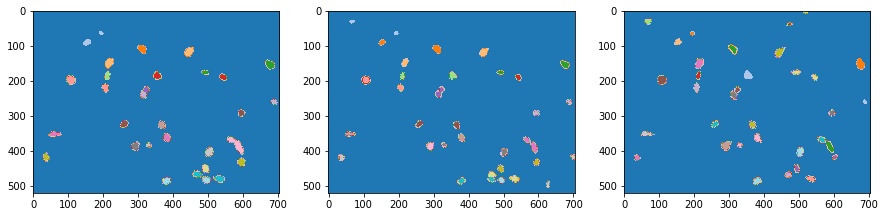

50


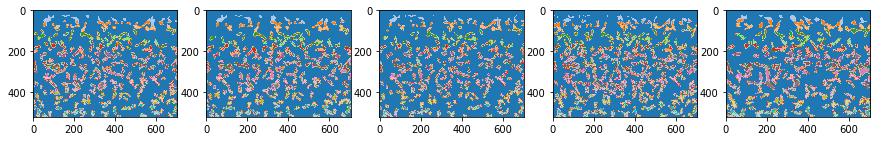

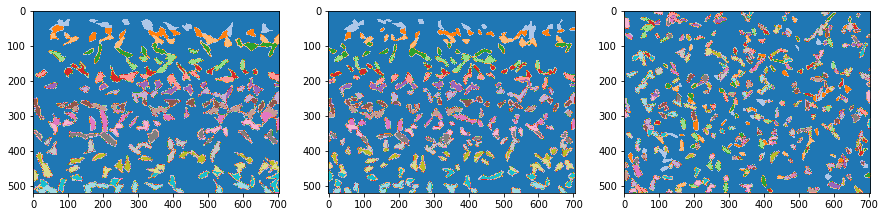

51


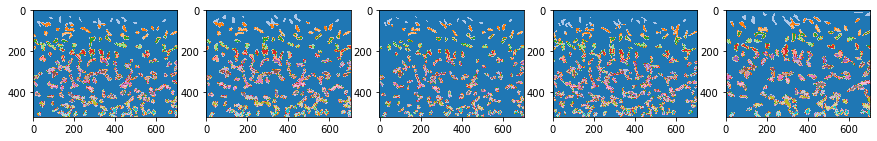

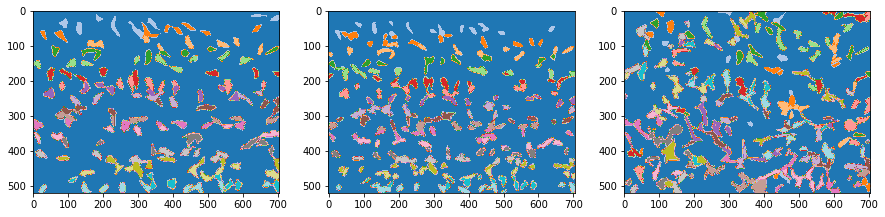

52


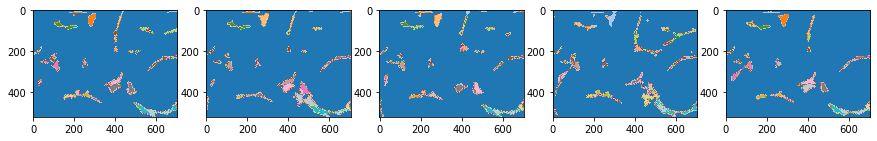

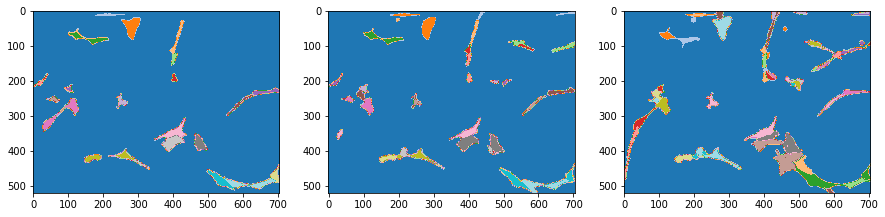

53


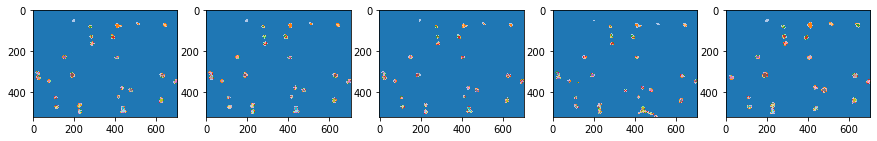

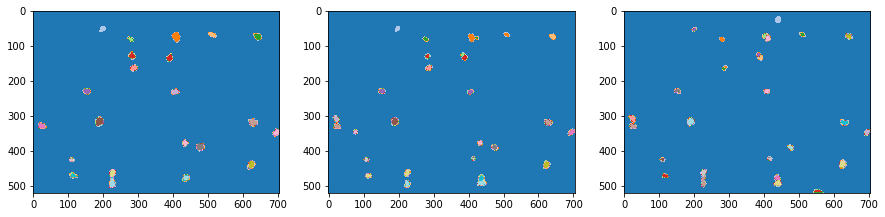

54


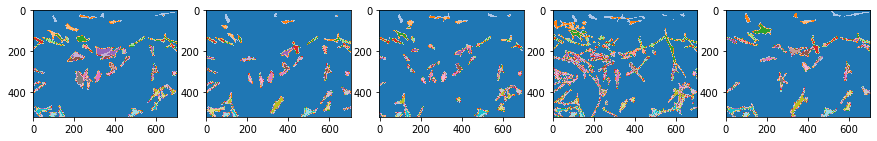

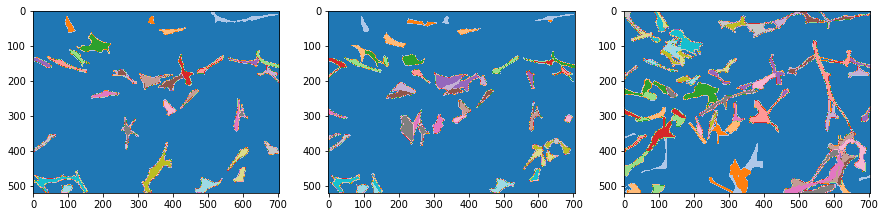

55


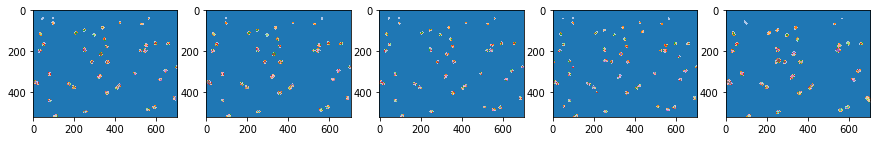

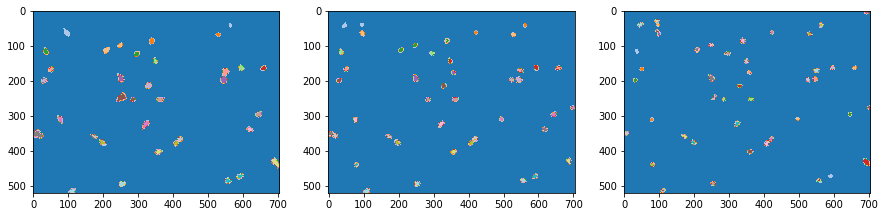

56


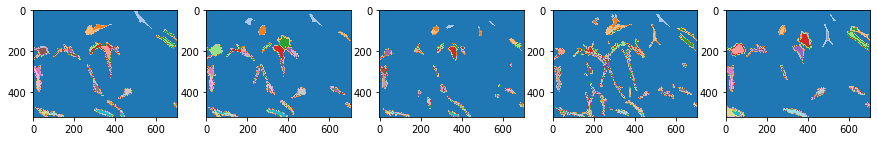

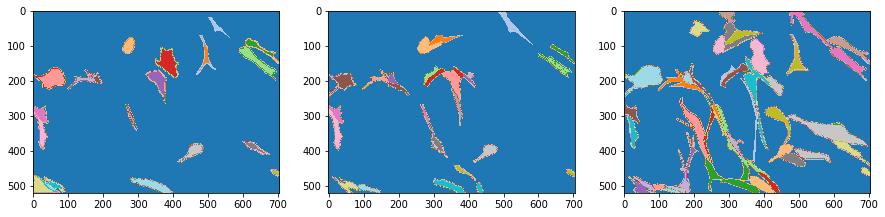

57


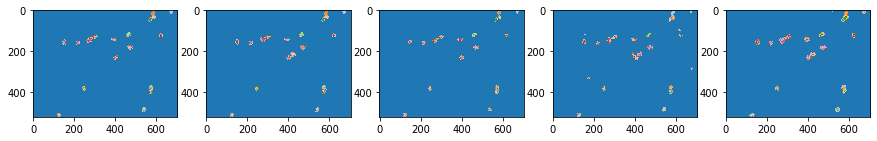

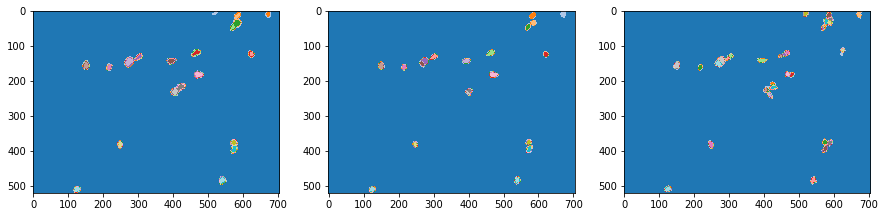

58


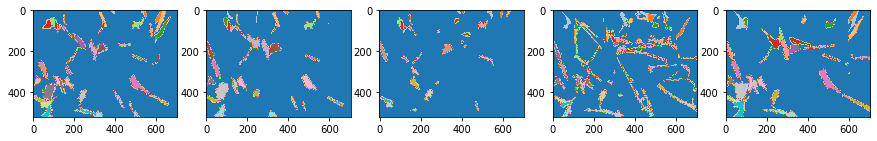

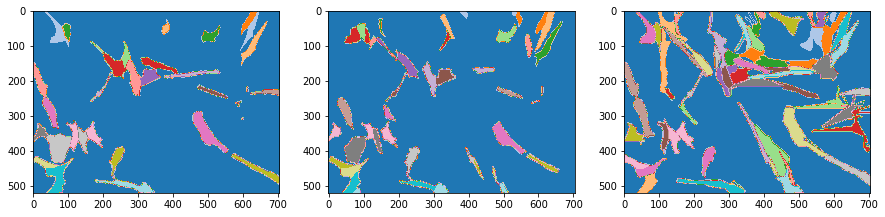

59


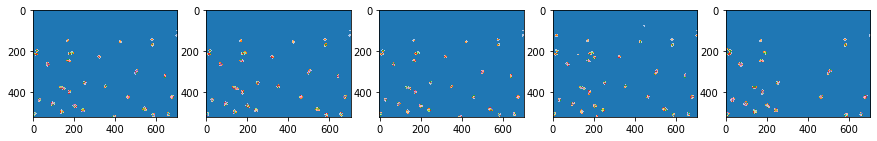

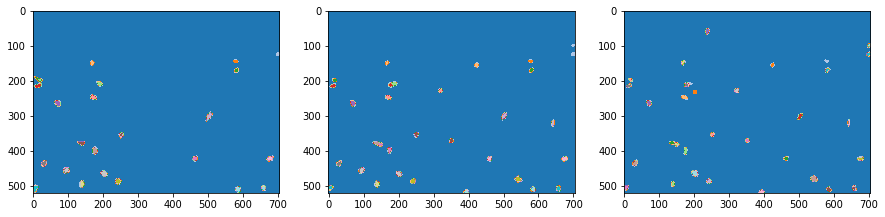

60


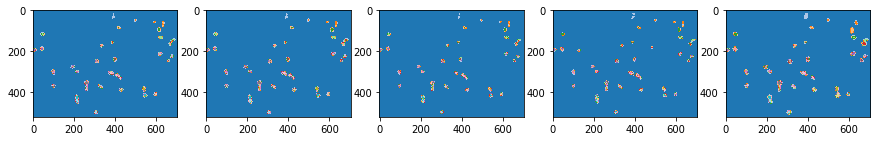

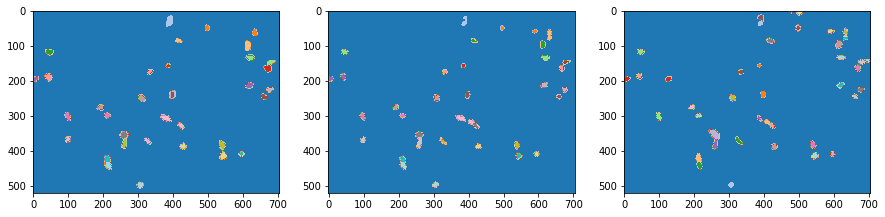

0.31431195549619795

In [333]:
 ensemble_iou(submission_paths, train_df, visualize=True)

In [385]:
for submission_path in submission_paths:
    print(f"{calc_iou(submission_path, train_df):.6f} - {submission_path.split('/')[-3]}")

0.311346 - experiment_cyto_diameter20
0.202318 - experiment_cyto_diameter0
0.233060 - experiment_omni_diameter20
0.260292 - experiment_omni_diameter0
0.320931 - experiment_nuclei_diameter0
0.270543 - experiment_nuclei_diameter20
0.316851 - experiment_nuclei_diameter0_longer
0.212177 - experiment_nuclei_diameter16
0.302792 - experiment_nuclei_diameter24
